# Assignment 1.4: Polynomial Model

* *Version 1.4: Added division by `n_samples` in gradient expression. Also inserted the transpose back in to the math expression just before the def polynomial_model line.*
* *Version 1.3: Changed 'linear model' to 'polynomial model' when referring to what to plot.*
* *Version 1.2: The mathematical expression just before `polynomial_gradient(X, T, W):` incorrectly had the transpose of the matrix of powers of X.  The transpose has been removed from this most recent version.*
* *Version 1.1: Added all details, including grading script.  Also removed the sentence the steps for defining and plotting X and T for the air quality experiments being different from lecture.  It is not different from what was done in lecture.*

SURAJ ESWARAN

In this first assignment, you will write and apply python code that performs gradient descent to fit a polynomial model to the air quality data discussed in the lecture during the first week.  

## STEP 1: EXTRACTING DATA FROM CSV FILE

The [machine learning repository at the University of California, Irvine](http://archive.ics.uci.edu/ml), is a great resource for publicly available data with explanations for machine learning researchers.  Here we download the air quality data set.  If `curl` is not available on your system, you may use the above link to find and download this data.  It is useful to go the link and find the page describing this data set. That page is [here](http://archive.ics.uci.edu/ml/datasets/Air+quality).

Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells. 

## STEP 2: SEGREGATING DATA FROM CSV

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rc('animation', html='jshtml')
plt.rc('animation', embed_limit = 1e9)

In [24]:
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']
use=list(np.arange(len(col)))
data = pd.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data.head()
data = data.dropna(axis=0)
data.shape

(827, 15)

In [25]:
CO = data['CO(GT)']
#print (CO)
CO[:43]                                                     # Using first 43 samples.
#print (CO)
hour = np.array([int(t[:2]) for t in data['Time']])         # Getting the hour part of the time string and convert to an int.
CO = np.array(data['CO(GT)'])                               # Transforming the pandas data into a numpy array.
T = CO.reshape(-1, 1)                                       # CO Data is in a single column
Tnames = ['CO']                                             # Create labels as CO 
X = hour.reshape(-1, 1)                                     # Hour Data is in a single column 
Xnames = ['Hour']
print(np.hstack(X**2)@T)
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

[431007.7]
X.shape = (827, 1) Xnames = ['Hour']
T.shape = (827, 1) Tnames = ['CO']


#### GRAPH 1: AIR QUALITY OF CO(GT)  VS. HOUR OF THE DAY  

Plot `CO(GT)` air quality (on the y axis) versus the hour of the day (on the x axis) to verify you have prepared the data correctly.

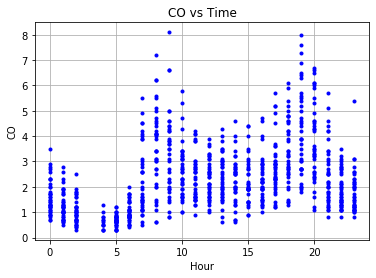

In [26]:
plt.plot(X,T,'.', color='blue')     # Plot CO(GT) vs Hour of the day,each data point is identified as '.' with blue color
plt.grid(True)                      # Displaying a grid on graph  
plt.title('CO vs Time')             # Providing a title for the graph
plt.xlabel(Xnames[0])               # Providing Label for X-axis
plt.ylabel(Tnames[0]);              # Providing Label for y-axis 

## STEP 3: POLYNOMIAL MODEL 

Write code to implement a polynomial that returns the result

$$f(x) = w_0 + w_1 x + w_2 x^2 + \cdots + w_{p-1} x^{p-1}$$

Name this function `polynomial_model` that is called with two arguments, a column matrix of input values with number of rows equal to the number of samples, and a column matrix of weights with the number of rows equal to the number of powers $p$ to use. Notice that the first term on the right-hand side is actually $w_0 x^0$.

* `polynomial_model(X, W)`:
    * Given
        * `X`, an n_samples x 1 numpy array of input samples
        * `W`, an n_powers x 1 numpy array of weight values
    * Return
        * an n_samples x 1 numpy array of the model's predicted outputs for each sample in `X`.

In [27]:
def polynomial_model(X, W):
    #print(X.shape, W.shape)
    stack = np.hstack([X**i for i in range(1, len(W))])
    return stack @ W[1:, :] + W[0, :]

## STEP 4: POLYNOMIAL GRADIENT

Implement the gradient of the mean-squared-error between the target values in `T` and the model's output, with respect to the weights, `W`.

$$ \begin{align*}
\nabla_W E
&= \nabla_Y E \; \nabla_W Y\\
&= -2 (T - Y) \; \nabla_W Y\\
&= -2 (T - Y) \; [1,\; x,\; x^2,\; x^3,\; \ldots,\; x^{p-1}]
\end{align*}$$

for one sample $x$.  With $X$ being a matrix of multiples samples, one per row, we must modify the equation to this. Notice the transpose of the matrix of powers of $X$.  <font color=red>The following expression is now divided by `n_samples`.</font>

$$\nabla_W E = [1,\; X,\; X^2,\; X^3,\; \ldots,\; X^{p-1}]^T \;(-2)\; (T - Y) \;/\; \text{n_samples}$$
\;
* `polynomial_gradient(X, T, W)`:
   * Given
       * `X`, an n_samples x 1 numpy array of input samples
       * `T`, an n_samples x 1 numpy array of correct outputs (targets) for each input sample
       * `W`, an n_powers x 1 numpy array of weight values
    * Return
       * an n_powers x 1 numpy array of the gradient of the mean squared error with respect to each weight. (Same shape is W.)

In [28]:
def polynomial_gradient(X, T, W):
    dEdY = -2 * (T - polynomial_model(X, W))
    all_but_bias = np.hstack(([X**i for i in range(1,len(W))]))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the polynomial model on the same graph.

## STEP 5:  GRADIENT DESCENT ADAM 

Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the polynomial model, as illustrated in lecture. See [ADAM: A Method for Stochastic Optimization](https://arxiv.org/pdf/1412.6980.pdf) by Diederik P. Kingma and Jimmy Lei Ba.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [30]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, nSteps):
    # Commonly used parameter values
    alpha = rho
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    for step in range(nSteps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= alpha * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence

def rmse(model, X, T, W):
    return np.sqrt(np.mean(  (T - model(X, W)) **2 )  )

#### GRAPH 2: 

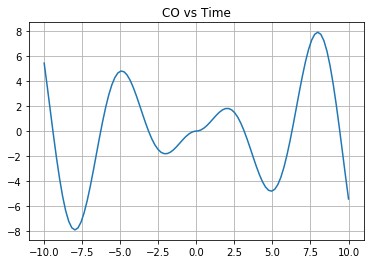

In [31]:
X = np.linspace(-10, 10, 100).reshape(-1, 1)
T = np.sin(X) * np.abs(X)
plt.grid(True)                                    # Displaying a grid on grap
plt.title('CO vs Time')                           # Providing a title for the graph
plt.plot(X, T);

## STEP 6: POLONOMIAL MODEL WITH DIFFERENT LEARNING RATES

Try several different values of `n_powers` and `n_steps`.

In [32]:
data = [[5, 1000], [5, 2000],[5,3000],[4,1000],[4,2000],[4,3000],[3,1000],[3,2000],[3,3000]]
pd.DataFrame(data, columns=["n_powers", "n_steps"])

,n_powers,n_steps
0,5,1000
1,5,2000
2,5,3000
3,4,1000
4,4,2000
5,4,3000
6,3,1000
7,3,2000
8,3,3000


### n_power=5 and n_steps=1000

Final RMSE for rho 0.01 at step 1000 is 1.898190


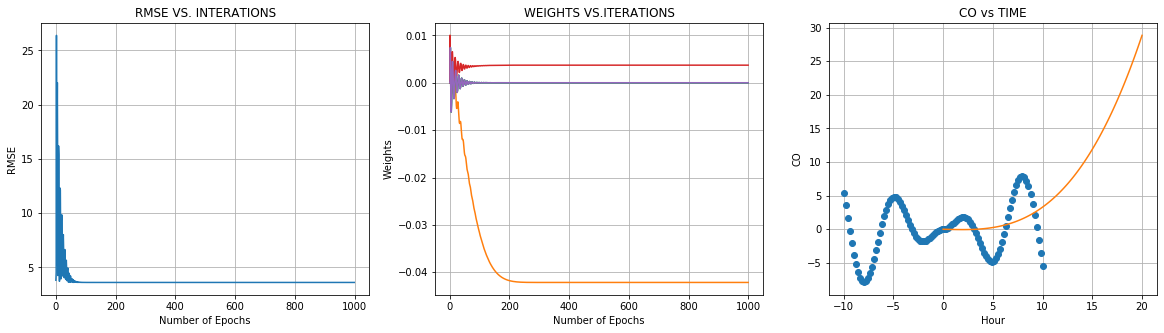

In [33]:
# Learning rates for each model is rhos
rhos = [0.01] 
n_powers = 5
# Test each learning rate in the list
for i in rhos:
    W = np.zeros((n_powers, 1))
    rho = i 
# Number of steps to train
    n_steps = 1000                                                                     
    W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, polynomial_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.title('')
    plt.grid(True)                      # Displaying a grid on graph
    plt.title('RMSE VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.title('WEIGHTS VS.ITERATIONS')
    plt.grid(True)                      # Displaying a grid on graph
    plt.xlabel('Number of Epochs')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 20, 100).reshape(-1, 1)
    plt.plot(xs, polynomial_model(xs, W))
    plt.title('CO vs TIME')
    plt.grid(True)                      # Displaying a grid on graph
    plt.xlabel('Hour')
    plt.ylabel('CO')

1. Number of powers and steps were given 5 and 1000 respectively. The training value was chosen to be 0.01.
2. Finial RMSE value at step 1000 for learning rate 0.01 is found out to be 1.898190.
3. From the graph RMSE vs Iterations, as the number of iterations increases at the same value of RMSE. But there seems to be a spike from zero to fifty, then it follows a stable level. 
4. In the graph Weights vs Iterations, there seems to be a declination to neagtive value in the trainning data , where the error rate and data rate seems to have a spike and follows a stable level from fifty onwards.
4. The graph CO vs Time, the training data tend to be increase exponentially at the point of 10, following the polynomial graph theory where there seems to be lots of outlines as the data seems to point on the negative axis. Due to learning rate, it tend to show these kinds of trends. 
5. As the learning data increases , there will be better estimation of the results. 

### n_power=5 and n_steps=2000

Final RMSE for rho 0.01 at step 2000 is 1.898190


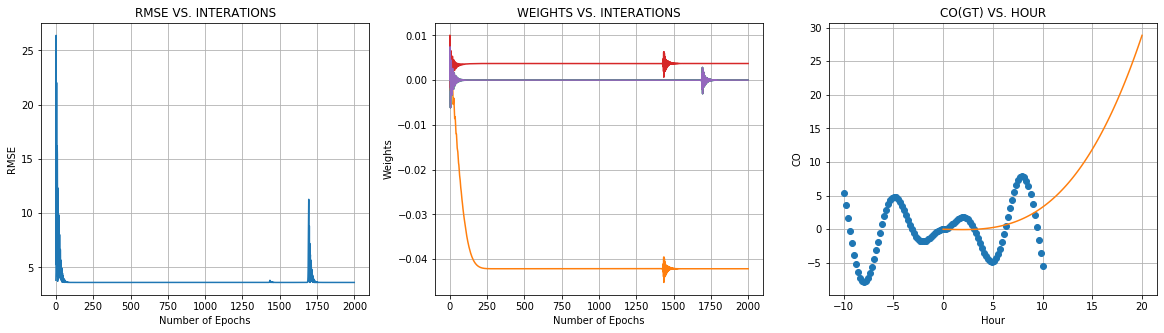

In [34]:
# Learning rates for each model is rhos
rhos = [0.01] 
n_powers = 5
# Test each learning rate in the list
for i in rhos:
    W = np.zeros((n_powers, 1))
    rho = i 
# Number of steps to train
    n_steps = 2000                                                                     
    W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, polynomial_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.grid(True)
    plt.title('RMSE VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.grid(True)
    plt.title('WEIGHTS VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 20, 100).reshape(-1, 1)
    plt.plot(xs, polynomial_model(xs, W))
    plt.grid(True)
    plt.title('CO(GT) VS. HOUR')
    plt.xlabel('Hour')
    plt.ylabel('CO')

1. Number of powers and steps were given 5 and 2000 respectively. The training value was chosen to be 0.01.
2. Finial RMSE value at step 1000 for learning rate 0.01 is found out to be 1.898190.
3. From the graph RMSE vs Iterations, as the number of iterations increases at the same value of RMSE,but there seems to be an anomaly at 1750 step and later follows stable line. Same as the previous graph,there seems to be an another spike from zero to fifty. 
4. In the graph Weights vs Iterations, there seems to be a declination to neagtive value in the trainning data , where the error rate and data rate seems to have a spike at 1300 and 1600 respectively and continues a linear level.
4. The graph CO vs Time, the training data tend to be increase exponentially at the point of 10, following the polynomial graph theory where there seems to be lots of outlines as the data seems to point on the negative axis.Due to learning rate, it tend to show these kinds of trends. 
5. As the learning data increases,there will be better estimation of the results. 

### n_power=5 and n_steps=3000

Final RMSE for rho 0.01 at step 3000 is 1.898195


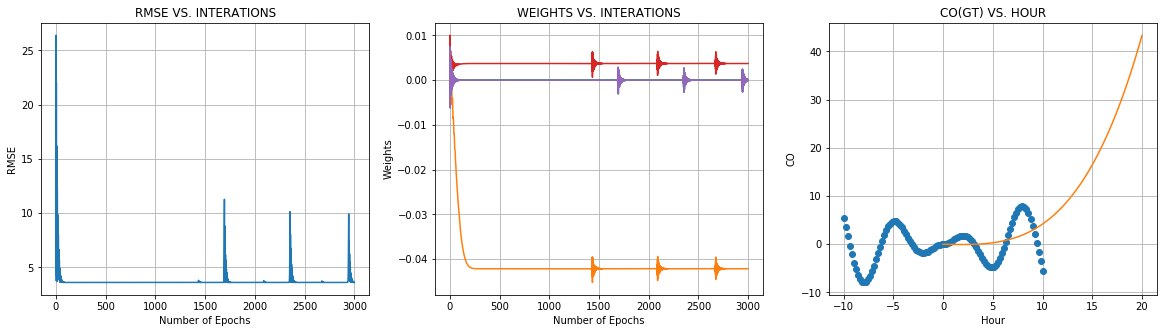

In [35]:
# Learning rates for each model is rhos
rhos = [0.01] 
n_powers = 5
# Test each learning rate in the list
for i in rhos:
    W = np.zeros((n_powers, 1))
    rho = i 
# Number of steps to train
    n_steps = 3000                                                                    
    W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, polynomial_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.grid(True)
    plt.title('RMSE VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.grid(True)
    plt.title('WEIGHTS VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 20, 100).reshape(-1, 1)
    plt.plot(xs, polynomial_model(xs, W))
    plt.grid(True)
    plt.title('CO(GT) VS. HOUR')
    plt.xlabel('Hour')
    plt.ylabel('CO')

1. Number of powers and steps were given 5 and 3000 respectively. The training value was chosen to be 0.01.
2. Finial RMSE value at step 1000 for learning rate 0.01 is found out to be 1.898195.
3. From the graph RMSE vs Iterations, there are several spikes that are recorded while running the graph.The peak value tend to be above 25 and the least value is 3.Thus, it shows number of interations are not determining the RMSE value.  
4. In the graph Weights vs Iterations, there seems to be a huge declination to negative value in the trainning data followed by some small spikes at 1400, 2200 and 2700 iteration.The error rate and data rate seems to foloowed at same level but tend to produce some small trends at various intervals.
4. The graph CO vs Time, the training data tend to be increase exponentially at the point of 10, following the polynomial graph theory where there seems to be lots of outlines as the data seems to point on the negative axis.Due to learning rate, it tend to show these kinds of trends. It showcases to point out at level 40 for 20 hours. 
5. As the learning data increases,there will be better estimation of the results. 

### n_power=4 and n_steps=1000

Final RMSE for rho 0.01 at step 1000 is 1.898190


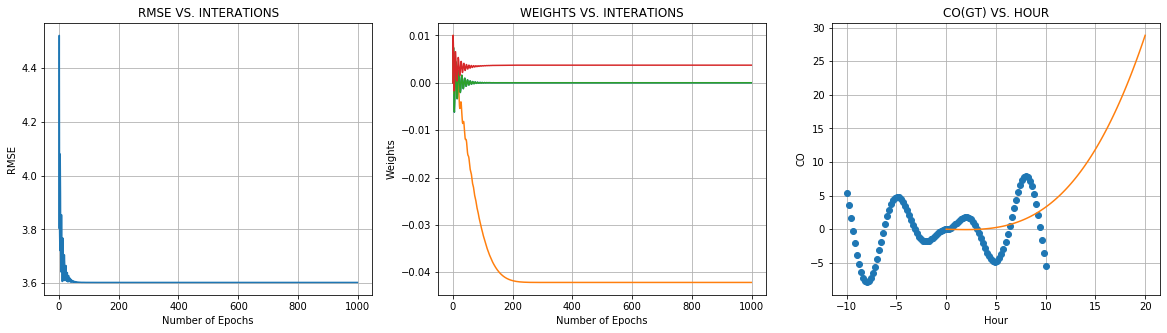

In [36]:
# Learning rates for each model is rhos
rhos = [0.01] 
n_powers = 4
# Test each learning rate in the list
for i in rhos:
    W = np.zeros((n_powers, 1))
    rho = i 
# Number of steps to train
    n_steps = 1000                                                                    
    W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, polynomial_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.grid(True)
    plt.title('RMSE VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.grid(True)
    plt.title('WEIGHTS VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 20, 100).reshape(-1, 1)
    plt.plot(xs, polynomial_model(xs, W))
    plt.grid(True)
    plt.title('CO(GT) VS. HOUR')
    plt.xlabel('Hour')
    plt.ylabel('CO')

1. Number of powers and steps were given 4 and 1000 respectively. The training value was chosen to be 0.01.
2. Finial RMSE value at step 1000 for learning rate 0.01 is found out to be 1.898190.
3. From the graph RMSE vs Iterations, there is a spike recorded between ero to fifty.The peak value tend to be above 5.After fifty, the value of the RSME tends to be 3.6.  
4. In the graph Weights vs Iterations, there seems to be a huge declination to negative value in the trainning data until 180  and .The error rate and data rate seems to foloowed at same level but tend to produce some small trends at various intervals.
4. The graph CO vs Time, the training data tend to be increase exponentially at the point of 10, following the polynomial graph theory where there seems to be lots of outlines as the data seems to point on the negative axis.Due to learning rate, it tend to show these kinds of trends. 
5. As the learning data increases,there will be better estimation of the results. 

### n_power=4 and n_steps=2000

Final RMSE for rho 0.01 at step 2000 is 1.898190


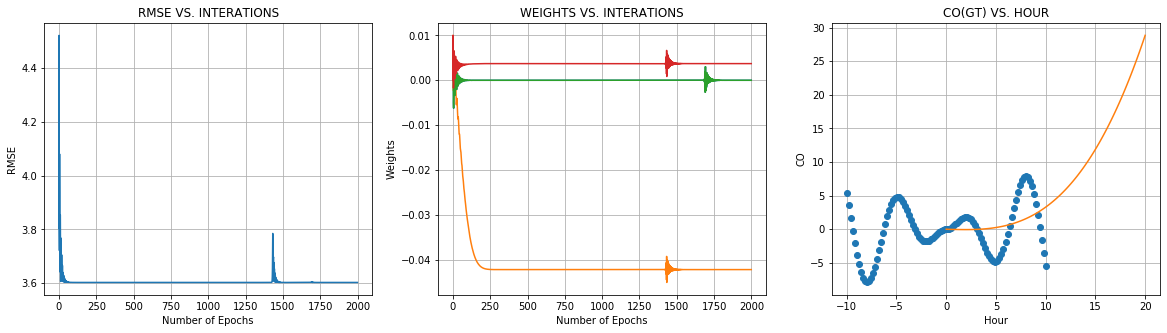

In [37]:
# Learning rates for each model is rhos
rhos = [0.01] 
n_powers = 4
# Test each learning rate in the list
for i in rhos:
    W = np.zeros((n_powers, 1))
    rho = i 
# Number of steps to train
    n_steps = 2000                                                                    
    W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, polynomial_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.grid(True)
    plt.title('RMSE VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.grid(True)
    plt.title('WEIGHTS VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 20, 100).reshape(-1, 1)
    plt.plot(xs, polynomial_model(xs, W))
    plt.grid(True)
    plt.title('CO(GT) VS. HOUR')
    plt.xlabel('Hour')
    plt.ylabel('CO')

1. Number of powers and steps were given 4 and 2000 respectively. The training value was chosen to be 0.01.
2. Finial RMSE value at step 2000 for learning rate 0.01 is found out to be 1.898190.
3. From the graph RMSE vs Iterations, there is a spike recorded between zero to fifty.The peak value tend to be above 5.After fifty, the value of the RSME tends to be 3.6.  
4. In the graph Weights vs Iterations, there seems to be a huge declination to negative value in the trainning data until 180  and .The error rate and data rate seems to foloowed at same level but tend to produce some small trends at various intervals.
4. The graph CO vs Time, the training data tend to be increase exponentially at the point of 10, following the polynomial graph theory where there seems to be lots of outlines as the data seems to point on the negative axis.Due to learning rate, it tend to show these kinds of trends. 
5. As the learning data increases,there will be better estimation of the results. 

### n_power=4 and n_steps=3000

Final RMSE for rho 0.01 at step 3000 is 1.898190


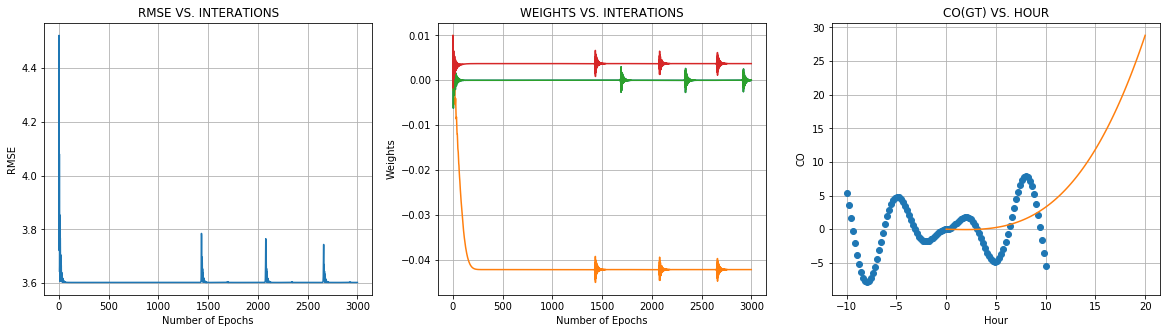

In [38]:
# Learning rates for each model is rhos
rhos = [0.01] 
n_powers = 4
# Test each learning rate in the list
for i in rhos:
    W = np.zeros((n_powers, 1))
    rho = i 
# Number of steps to train
    n_steps = 3000                                                                    
    W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, polynomial_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.grid(True)
    plt.title('RMSE VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.grid(True)
    plt.title('WEIGHTS VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 20, 100).reshape(-1, 1)
    plt.plot(xs, polynomial_model(xs, W))
    plt.grid(True)
    plt.title('CO(GT) VS. HOUR')
    plt.xlabel('Hour')
    plt.ylabel('CO')

1. Number of powers and steps were given 4 and 3000 respectively.The training value was chosen to be 0.01.
2. Final RMSE value at step 3000 for learning rate 0.01 is found out to be 1.898190.
3. From the graph RMSE vs Iterations, there is several spikes recorded at zero,1400,2100 and 2700.The peak value tend to be above 5.After fifty, the value of the RSME tends to be 3.6.  
4. In the graph Weights vs Iterations, there seems to be a huge declination to negative value in the trainning data, followed by small spikes ar 1400,2100 and 2700.The error rate and data rate seems to be followed at same level but tend to produce some small trends at regular intervals.
4. The graph CO vs Time, the training data tend to be increase exponentially at the point of 10, following the polynomial graph theory where there seems to be lots of outlines as the data seems to point on the negative axis.Due to learning rate, it tend to show these kinds of trends. 
5. As the learning data increases,there will be better estimation of the results. 

### n_power=3 and n_steps=1000

Final RMSE for rho 0.01 at step 1000 is 1.910274


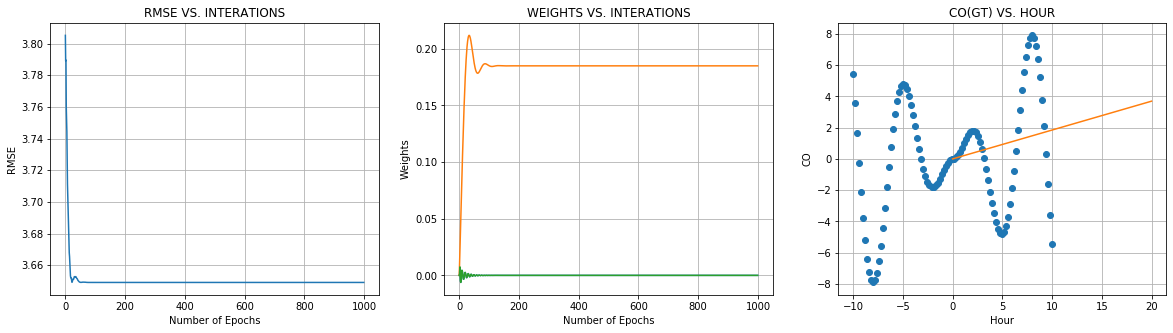

In [39]:
# Learning rates for each model is rhos
rhos = [0.01] 
n_powers = 3
# Test each learning rate in the list
for i in rhos:
    W = np.zeros((n_powers, 1))
    rho = i 
# Number of steps to train
    n_steps = 1000                                                                    
    W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, polynomial_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.grid(True)
    plt.title('RMSE VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.grid(True)
    plt.title('WEIGHTS VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 20, 100).reshape(-1, 1)
    plt.plot(xs, polynomial_model(xs, W))
    plt.grid(True)
    plt.title('CO(GT) VS. HOUR')
    plt.xlabel('Hour')
    plt.ylabel('CO')

1. Number of powers and steps were given 3 and 1000 respectively.The training value was chosen to be 0.01.
2. Final RMSE value at step 3000 for learning rate 0.01 is found out to be 1.910274.
3. From the graph RMSE vs Iterations, there is a big spike recorded between zero to fifty.The peak value tend to be above 3.8.After fifty, the value of the RSME tends to be 3.6.  
4. In the graph Weights vs Iterations, there is a huge increase in training data, obtaining a peak value of 0.25.Then a steep decrease in slope and stable flow at the rate of 0.17.
4. The graph CO vs Time, the training data tend to be increase linearly, following the polynomial graph theory where there seems to be lots of outlines as the data seems to point on the negative axis.Due to learning rate, it tend to show these kinds of trends. 
5. As the learning data increases,there will be better estimation of the results.

### n_power=3 and n_steps=2000

Final RMSE for rho 0.01 at step 2000 is 1.910274


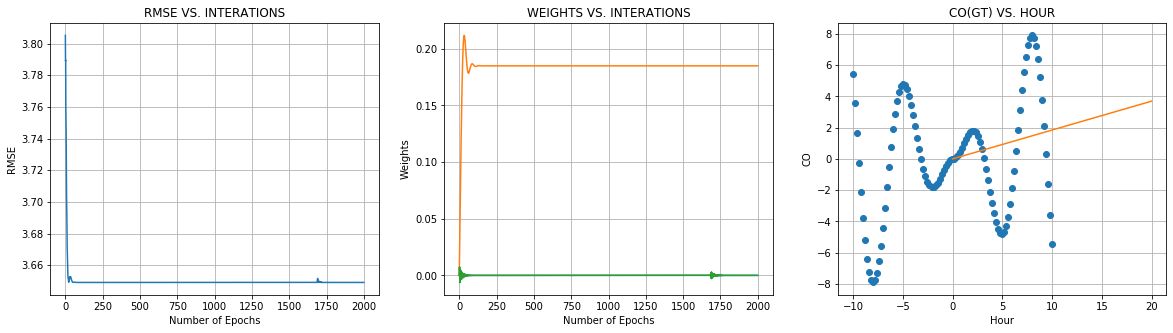

In [40]:
# Learning rates for each model is rhos
rhos = [0.01] 
n_powers = 3
# Test each learning rate in the list
for i in rhos:
    W = np.zeros((n_powers, 1))
    rho = i 
# Number of steps to train
    n_steps = 2000                                                                    
    W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, polynomial_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.grid(True)
    plt.title('RMSE VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.grid(True)
    plt.title('WEIGHTS VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 20, 100).reshape(-1, 1)
    plt.plot(xs, polynomial_model(xs, W))
    plt.grid(True)
    plt.title('CO(GT) VS. HOUR')
    plt.xlabel('Hour')
    plt.ylabel('CO')

1. Number of powers and steps were given 3 and 2000 respectively.The training value was chosen to be 0.01.
2. Final RMSE value at step 3000 for learning rate 0.01 is found out to be 1.910274.
3. From the graph RMSE vs Iterations, there is a big decliantion from zero to 22.Then,The peak value tend to be above 3.8.After fifty, the value of the RSME tends to be 3.6. Following that there seems to be a small peak at 1600.  
4. In the graph Weights vs Iterations, there is a huge increase in training data, obtaining a peak value of 0.23.Then a steep decrease in slope and stable flow at the rate of 0.18.
4. The graph CO vs Time, the training data tend to be increase linearly, following the polynomial graph theory where there seems to be lots of outlines as the data seems to point on the negative axis.Due to learning rate, it tend to show these kinds of trends. 
5. As the learning data increases,there will be better estimation of the results.

### n_power=3 and n_steps=3000

Final RMSE for rho 0.01 at step 3000 is 1.910274


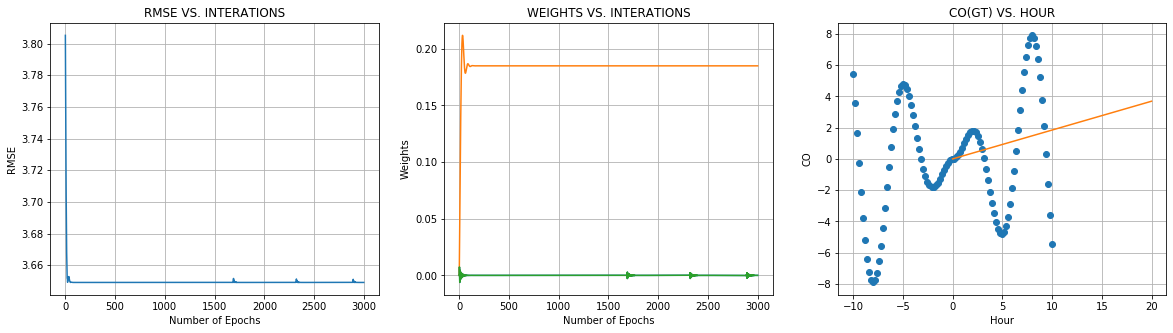

In [41]:
# Learning rates for each model is rhos
rhos = [0.01] 
n_powers = 3
# Test each learning rate in the list
for i in rhos:
    W = np.zeros((n_powers, 1))
    rho = i 
# Number of steps to train
    n_steps = 3000                                                                    
    W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, polynomial_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.grid(True)
    plt.title('RMSE VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.grid(True)
    plt.title('WEIGHTS VS. INTERATIONS')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 20, 100).reshape(-1, 1)
    plt.plot(xs, polynomial_model(xs, W))
    plt.grid(True)
    plt.title('CO(GT) VS. HOUR')
    plt.xlabel('Hour')
    plt.ylabel('CO')

1. Number of powers and steps were given 3 and 3000 respectively.The training value was chosen to be 0.01.
2. Final RMSE value at step 3000 for learning rate 0.01 is found out to be 0.016156.
3. From the graph RMSE vs Iterations, there is a big decliantion from zero to 50.Then,The peak value tend to be 0.5.After fifty, the value of the RSME tend to provide so many peaks at 1700,2200 and 2700.  
4. In the graph Weights vs Iterations, there is a reduce in training data then increases and follows a steady flow of 0.018.
4. The graph CO vs Time, the training data tend to be increase linearly, following the polynomial graph theory.Due to learning rate,it tend to show these kinds of trends. 
5. As the learning data increases,there will be better estimation of the results.

# RESULT

1. Number of power is inversely proportional to Root Mean Square Error(RMSE) as the power value increases, RMSE decreases slightly. Thus, we can result that number of power determines the value of RMSE.  

In [42]:
data = [[5, 1000,1.898190], [5, 2000,1.898190],[5,3000,1.898195],[4,1000,1.898190],[4,2000,1.898190],[4,3000,1.898190],[3,1000,1.910274],[3,2000,1.910274],[3,3000,1.910274]]
pd.DataFrame(data, columns=["n_powers", "n_steps","RSME"])


,n_powers,n_steps,RSME
0,5,1000,1.898190
1,5,2000,1.898190
2,5,3000,1.898195
3,4,1000,1.898190
4,4,2000,1.898190
5,4,3000,1.898190
6,3,1000,1.910274
7,3,2000,1.910274
8,3,3000,1.910274


<BarContainer object of 9 artists>

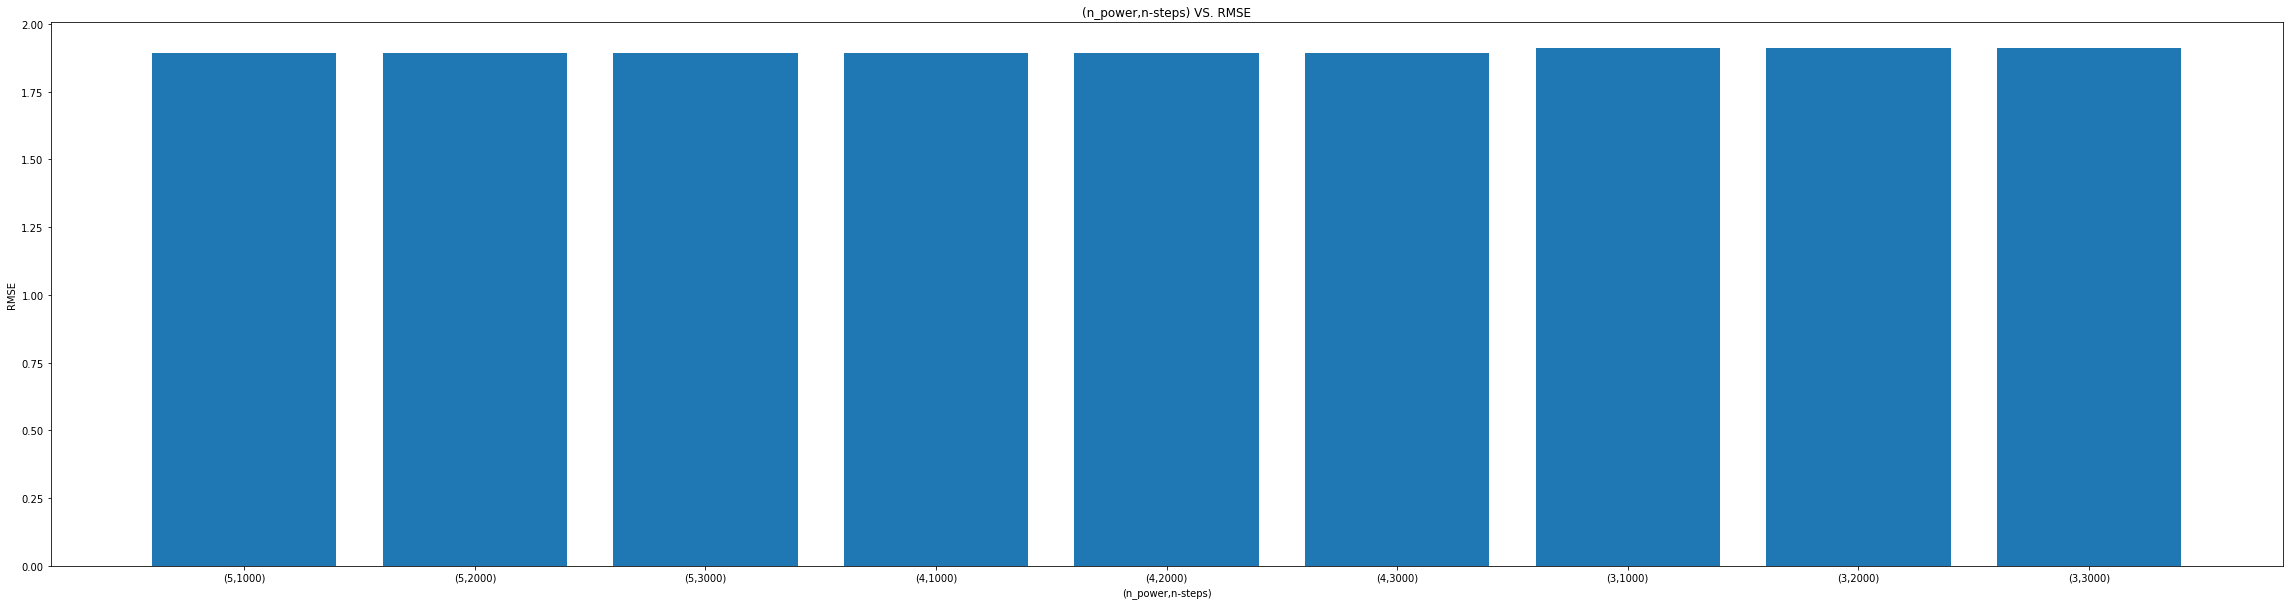

In [43]:
plt.figure(figsize=(40, 10))
plt.title('(n_power,n-steps) VS. RMSE')
plt.xlabel('(n_power,n-steps)')
plt.ylabel('RMSE')
plt.bar(['(5,1000)','(5,2000)','(5,3000)','(4,1000)','(4,2000)','(4,3000)','(3,1000)','(3,2000)','(3,3000)'],[1.89190,1.89190,1.89195,1.89190,1.89190,1.89190,1.910274,1.910274,1.910274 ])

2. Number of Iterations are not dependent on Root Mean Square Error(RMSE) as they tend to fall off from zero to fifty and follows a stable level with some peaks in betweeen the trends.
3. Lower power and higher number of iterations tend to deliver a positive weights. 
4. Lower power and higher number of iterations makes the training data linear. Thus, power and number of steps play an important role in determining the level of CO(GT) and hour of the day. 

# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) (to be provided soon) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 60/60 if your functions are defined correctly. The remaining 40 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [44]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'ESWARAN-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)
    T = np.array([[   4.2],
                  [  -4.8],
                  [  40.2],
                  [ -50.8],
                  [ 156.2],
                  [-454.8],
                  [ 820.2],
                  [-908.8]])
    gradient = polynomial_gradient(X, T, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
    T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
    W = np.zeros((5, 1))
    

# Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/109894).

Grading will be based on 

  * correct behavior of the required functions listed above,
  * easy to understand plots in your notebook,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.